In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The dataset "conjunto_de_datos_iter_00CSV20.csv" must be downloaded from: https://inegi.org.mx/programas/ccpv/2020/#Datos_abiertos, in the section 'Principales resultados por localidad (ITER)' and subsection 'Estados Unidos Mexicanos' it will be accessible. After downloading the dataset it must be relocated to the data folder.

In [2]:
df = pd.read_csv('../data/conjunto_de_datos_iter_00CSV20.csv')

C:\Users\TheAl\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


By using this query only the totals of each variable for each municipality is used well the rest of the dataframe is ignored.

In [3]:
df.query("NOM_LOC == 'Total de la Entidad'", inplace = True)
df

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
2061,2,Baja California,0,Total de la entidad Baja California,0,Total de la Entidad,NaN,NaN,NaN,3769020,...,1080169,800189,618175,384011,216865,41223,38772,293529,9582,*
7627,3,Baja California Sur,0,Total de la entidad Baja California Sur,0,Total de la Entidad,NaN,NaN,NaN,798447,...,226517,148723,136538,67961,36197,14508,8675,77223,2608,*
10188,4,Campeche,0,Total de la entidad Campeche,0,Total de la Entidad,NaN,NaN,NaN,928363,...,218322,114020,151613,38508,17976,23627,36397,130361,12028,*
12988,5,Coahuila de Zaragoza,0,Total de la entidad Coahuila de Zaragoza,0,Total de la Entidad,NaN,NaN,NaN,3146771,...,824291,519599,443659,195883,124077,17020,46420,332298,5754,*
17137,6,Colima,0,Total de la entidad Colima,0,Total de la Entidad,NaN,NaN,NaN,731391,...,206736,132395,114164,43881,22695,9173,12085,82366,2698,*
18396,7,Chiapas,0,Total de la entidad Chiapas,0,Total de la Entidad,NaN,NaN,NaN,5543828,...,944695,292189,433400,61298,32460,214333,379915,993929,151655,*
39883,8,Chihuahua,0,Total de la entidad Chihuahua,0,Total de la Entidad,NaN,NaN,NaN,3741869,...,1051045,650546,481871,282049,179964,42113,64419,432032,20158,*
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,...,2536523,2084156,1290811,957162,568827,46172,77272,561128,10528,*
52938,10,Durango,0,Total de la entidad Durango,0,Total de la Entidad,NaN,NaN,NaN,1832650,...,434450,215108,222785,73099,54664,22071,41801,243750,12446,*


By using the dictonary that the dataset offers, the selection of columns of interest is done.

In [4]:
df=df[['ENTIDAD','NOM_ENT','PCON_DISC','PCON_LIMI','PCLIM_PMEN','PSIND_LIM','GRAPROES','PSINDER','PDER_SS','PROM_OCUP',
       'TVIVPARHAB','VPH_SINTIC','POB0_14','POB15_64','POB65_MAS']].copy()

Based on the dictonary the columns are renamed in a clearer way.

In [5]:
df.rename(columns = {'ENTIDAD':'cve_ent','NOM_ENT':'states','PCON_DISC': 'population_disability','PCON_LIMI': 'population_limitation',
                     'PCLIM_PMEN': 'population_mental_problem','PSIND_LIM':'population_no_problems','GRAPROES': 'average_years_finish', 'PSINDER': 'no_med_afilation', 
                     'PDER_SS': 'med_afilation', 'PROM_OCUP': 'average_household_size','TVIVPARHAB': 'total_households','VPH_SINTIC': 'household_no_tics',
                    'POB0_14':'population_0_14_years_old','POB15_64':'population_15_64_years_old','POB65_MAS':'population_65_more_years_old'}, inplace=True)

To properly merge the dataframe from the week 1 analyzes with the dataframe that is currently being analyze it is necessary to obtain the code that describes the state of origin of the municipality.

It is also necessary to change the data types of the columns of interest to int and float data types, since this values will be normalized for further study.

In [6]:
df['population_disability'] = df['population_disability'].astype(int)
df['population_limitation'] = df['population_limitation'].astype(int)
df['population_mental_problem'] = df['population_mental_problem'].astype(int)
df['population_no_problems'] = df['population_no_problems'].astype(int)
df['average_years_finish'] = df['average_years_finish'].astype(float)
df['no_med_afilation'] = df['no_med_afilation'].astype(int)
df['med_afilation'] = df['med_afilation'].astype(int)
df['average_household_size'] = df['average_household_size'].astype(float)
df['total_households'] = df['total_households'].astype(int)
df['household_no_tics'] = df['household_no_tics'].astype(int)
df['population_0_14_years_old'] = df['population_0_14_years_old'].astype(int)
df['population_15_64_years_old'] = df['population_15_64_years_old'].astype(int)
df['population_65_more_years_old'] = df['population_65_more_years_old'].astype(int)

To obtain the total household which have TIC's it is necessary to substract from the total household the households that do not have TIC's

In [7]:
df['household_tics'] = df['total_households']-df['household_no_tics']
df.dtypes

cve_ent                           int64
states                           object
population_disability             int32
population_limitation             int32
population_mental_problem         int32
population_no_problems            int32
average_years_finish            float64
no_med_afilation                  int32
med_afilation                     int32
average_household_size          float64
total_households                  int32
household_no_tics                 int32
population_0_14_years_old         int32
population_15_64_years_old        int32
population_65_more_years_old      int32
household_tics                    int32
dtype: object

The week 1 analyzes it is read, so that future correlation between the previous dataframe and it can be observed.

In [8]:
dfWeek1 = pd.read_csv('../data/week1analyzesStates.csv')
dfWeek1['cve_ent'] = dfWeek1['cve_ent'].astype('int64')
dfWeek1

,cve_ent,state,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,1,AGUASCALIENTES,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
1,2,BAJA CALIFORNIA,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
2,3,BAJA CALIFORNIA SUR,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
3,4,CAMPECHE,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
4,7,CHIAPAS,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
5,8,CHIHUAHUA,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
6,5,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
7,6,COLIMA,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
8,9,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
9,10,DURANGO,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


The week 1 analyzes and the lastest dataframe is merged using the code of the state of origin of the municipality.

In [9]:
dfAll = pd.merge(df,dfWeek1,on=['cve_ent'])
dfAll

,cve_ent,states,population_disability,population_limitation,population_mental_problem,population_no_problems,average_years_finish,no_med_afilation,med_afilation,average_household_size,...,population_65_more_years_old,household_tics,state,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,1,Aguascalientes,71294,165482,20169,1177938,10.35,262088,1161139,3.68,...,97070,384734,AGUASCALIENTES,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
1,2,Baja California,151945,361269,52519,3213665,10.20,836317,2905265,3.26,...,245280,1139331,BAJA CALIFORNIA,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
2,3,Baja California Sur,35383,90233,10423,663217,10.34,129270,664122,3.30,...,48513,237860,BAJA CALIFORNIA SUR,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
3,4,Campeche,52259,112956,12314,753271,9.63,203304,719677,3.55,...,69838,248697,CAMPECHE,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
4,5,Coahuila de Zaragoza,134816,302543,35073,2683785,10.43,597373,2540708,3.48,...,229587,895129,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
5,6,Colima,39880,87325,10032,597614,10.05,123074,605947,3.21,...,61762,224155,COLIMA,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
6,7,Chiapas,227878,420261,53259,4843797,7.78,1814782,3698663,4.09,...,349031,1199368,CHIAPAS,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
7,8,Chihuahua,167788,394638,49299,3144228,10.00,574108,3156294,3.25,...,278960,1126237,CHIHUAHUA,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
8,9,Ciudad de México,493589,1141218,145428,7489519,11.48,2502789,6689012,3.32,...,1022105,2745791,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
9,10,Durango,101953,217850,22477,1499181,9.75,461394,1366665,3.69,...,142942,481252,DURANGO,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


Once merged the dataframes only the data that is possible to normalized is selected. After selecting the data the normalization of it is implemented based on the total population or total households of each municipality by obtain the percentage of people or households with the certain variable of interest.

In [10]:
dfAll = dfAll[['cve_ent','state','population','population_disability', 'population_limitation',
       'population_mental_problem','population_no_problems', 'average_years_finish', 'no_med_afilation',
       'med_afilation', 'average_household_size', 'cases_rate', 
       'cases_rate_last_60_days', 'deaths_rate',
       'deaths_rate_last_60_days','total_households','household_tics','household_no_tics',
        'population_0_14_years_old','population_15_64_years_old','population_65_more_years_old']].copy()
dfAll['pct_disability']=dfAll['population_disability']/dfAll['population']*100
dfAll['pct_limitation']=dfAll['population_limitation']/dfAll['population']*100
dfAll['pct_mental_problem']=dfAll['population_mental_problem']/dfAll['population']*100
dfAll['pct_no_problems']=dfAll['population_no_problems']/dfAll['population']*100
dfAll['pct_no_med_afilation']=dfAll['no_med_afilation']/dfAll['population']*100
dfAll['pct_med_afilation']=dfAll['med_afilation']/dfAll['population']*100
dfAll['pct_household_tics']=dfAll['household_tics']/dfAll['total_households']*100
dfAll['pct_household_no_tics']=dfAll['household_no_tics']/dfAll['total_households']*100
dfAll['pct_pop_0_14_years_old']=dfAll['population_0_14_years_old']/dfAll['population']*100
dfAll['pct_pop_15_64_years_old']=dfAll['population_15_64_years_old']/dfAll['population']*100
dfAll['pct_pop_65_more_years_old']=dfAll['population_65_more_years_old']/dfAll['population']*100

The data normalized is only selected to create a much simplier interpretation of the correlation.

In [11]:
dfFinal = dfAll[['cases_rate','cases_rate_last_60_days', 'deaths_rate',
        'deaths_rate_last_60_days','population','pct_disability',
        'pct_limitation','pct_mental_problem', 'pct_no_problems' ,'average_years_finish',
        'pct_no_med_afilation','pct_med_afilation', 'average_household_size',
        'pct_household_tics','pct_household_no_tics','pct_pop_0_14_years_old',
        'pct_pop_15_64_years_old','pct_pop_65_more_years_old']].copy()

The correlation of the data can be observed graphically using a pairplot as following

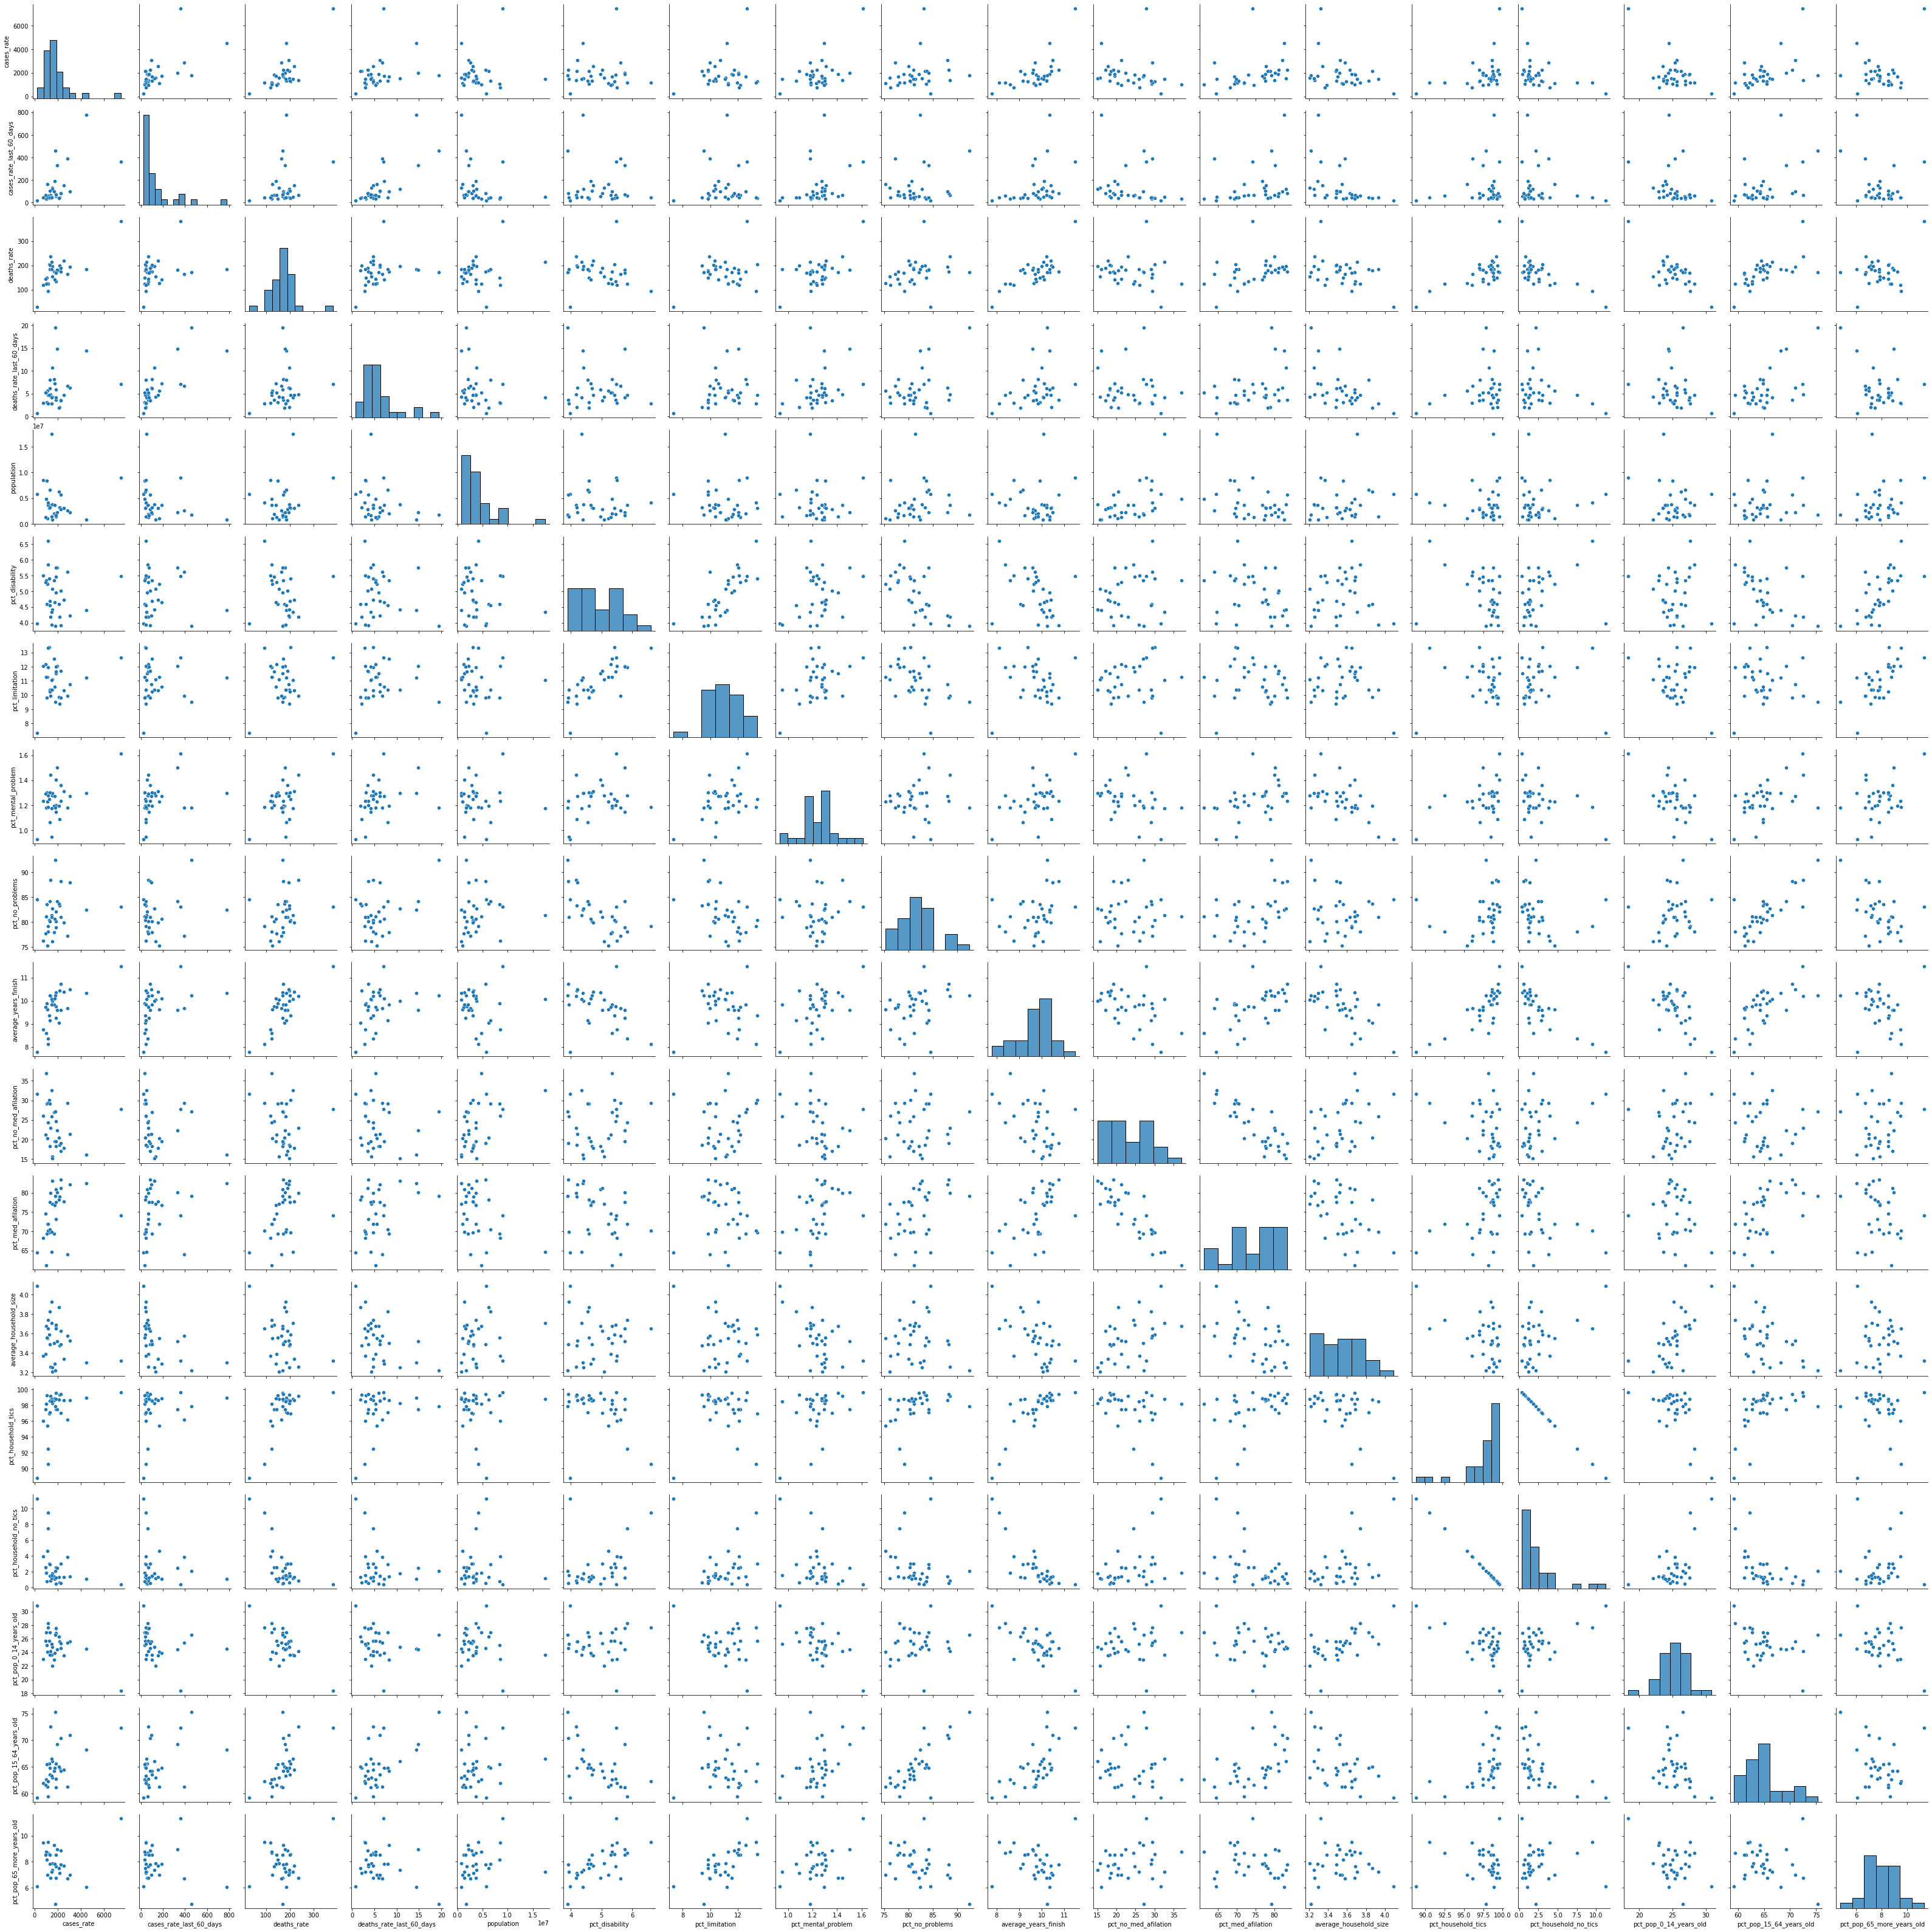

In [12]:
sns.pairplot(dfFinal)

Also the correlation is ilustrated using a diagonal correlation matrix map to simplify it as following

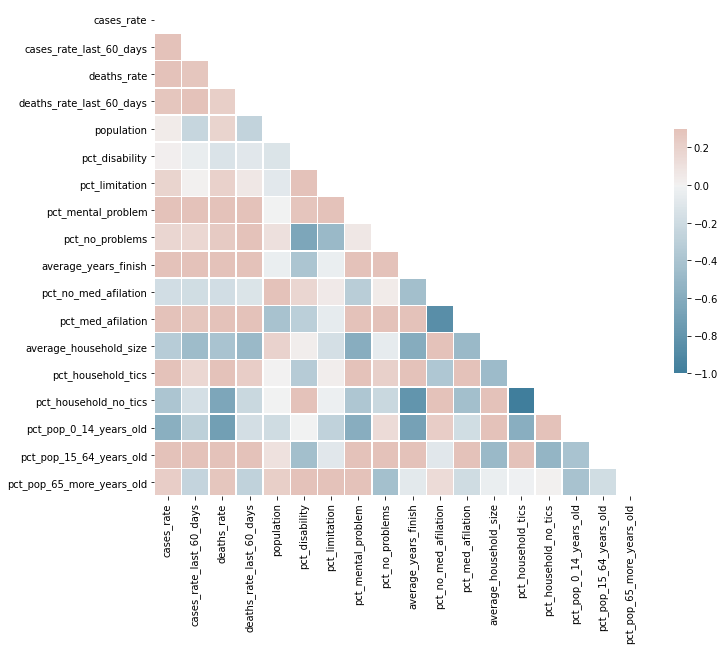

In [13]:
corr = dfFinal.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set_context('paper', font_scale=0.5)
heatmap = heatmap.get_figure()
#heatmap.savefig("../heatmap.png", bbox_inches="tight")

In [14]:
dfFinal = dfAll[['cve_ent','state','cases_rate','cases_rate_last_60_days', 'deaths_rate',
        'deaths_rate_last_60_days','population','pct_disability',
        'pct_limitation','pct_mental_problem', 'pct_no_problems' ,'average_years_finish',
        'pct_no_med_afilation','pct_med_afilation', 'average_household_size',
        'pct_household_tics','pct_household_no_tics','pct_pop_0_14_years_old',
        'pct_pop_15_64_years_old','pct_pop_65_more_years_old']].copy()

In [15]:
#dfFinal.to_csv('../data/week3analyzesStates.csv',index=False)